# Points to address

### 1) Exporting to Workspace Directory
### 2) Importing from Workspace Directory
### 3) Importing non-feature layer items/files from Content
### 4) ArcPy commands and Workspace Directory (i.e. can/does this operate as a gdb?)
### 5) Cleaning/removing temporary/intermediate file from Workspace Directory

# Welcome to your notebook.


#### Run this cell to connect to your GIS and get started:

In [1]:
from arcgis.gis import GIS
gis = GIS("home")
# from arcgis.features import summarize_data
import arcpy
from arcpy.sa import *
from arcpy.ia import *
import os
import shutil
import pandas as pd

/opt/conda/lib/python3.7/site-packages/arcgis/gis/__init__.py:575: UserWarning:

You are logged on as sdgs.today with an administrator role, proceed with caution.



#### Now you are ready to start!

In [2]:
# Item Added From Toolbar
# Title: OpenStreetMap Educational Establishments for Africa | Type: Feature Service | Owner: smoore2_osm
osm_edu = gis.content.get("90cf6859117c4e05ad474b55fd13553c")
osm_edu_layer = osm_edu.layers[0]
osm_edu_layer

<FeatureLayer url:"https://services-eu1.arcgis.com/zci5bUiJ8olAal7N/arcgis/rest/services/OSM_AF_Educational/FeatureServer/0">

In [3]:
# Filter to school amenities
schools = osm_edu_layer.query(where="amenity = 'school'")
schools

<FeatureSet> 82309 features

In [4]:
# Create Spatial Data Frame
schools_sdf = schools.sdf
schools_sdf.head(1)

,objectid,osm_id2,addr_city,addr_housenumber,addr_postcode,addr_state,addr_street,addr_unit,amenity,building,fee,name,name_en,opening_hours,operator,parking,phone,website,SHAPE
0,26,5640497251,None,None,None,None,None,None,school,None,None,Ecole Primaire Polele,None,None,None,None,None,None,"{""x"": 2027918.3959176855, ""y"": 5.2988077609437..."


# Workspace Directory

In [5]:
base_dir = '/arcgis/home'
mst_dir = 'mst'
mst_dir_path = f'{base_dir}/{mst_dir}'

In [6]:
shutil.rmtree(mst_dir_path)
os.mkdir(mst_dir_path)

## Export to Workspace Directory

In [7]:
# Identify Directory for .shp Output
schools_dir = 'school_locations.shp'
output_schools_shp = f'{mst_dir_path}/{schools_dir}'

In [8]:
# Output School Locations as .shp
columns = ['objectid', 'osm_id2','name', 'SHAPE']
schools_sdf[columns].spatial.to_featureclass(output_schools_shp, overwrite = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Import from Workspace Directory

In [9]:
schools_loc = arcpy.management.FeatureToPoint(output_schools_shp)
schools_loc

<Result '/arcgis/home/mst/school_locations_FeatureToPo.shp'>

## Import Imagery from Content

In [10]:
def rasterize_image(imageID):
    item = gis.content.get(imageID)
    img = item.get_data()
    rast = Raster(img)
    return rast

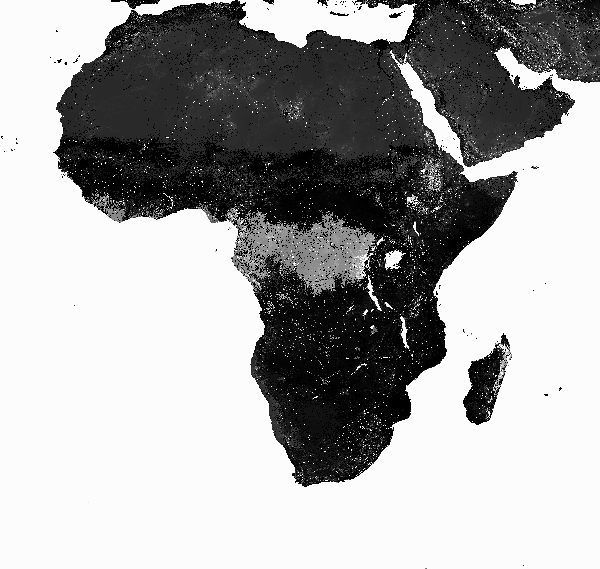

In [11]:
walk_time = rasterize_image("8b66b14e213048d8be51540707ccc4f6")
walk_time

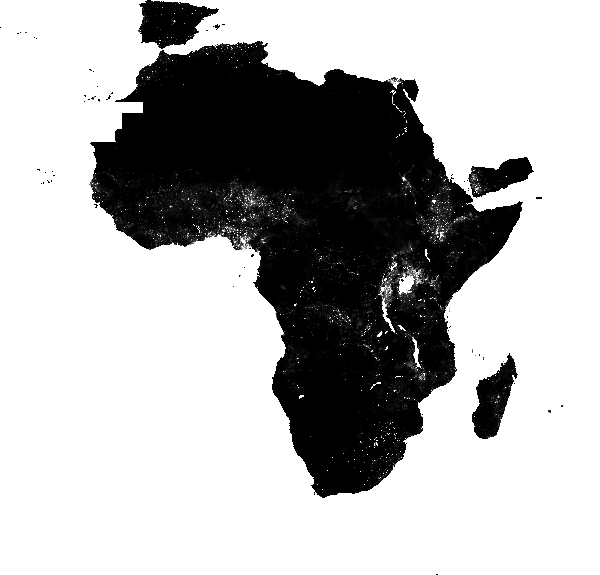

In [12]:
pop_sa_total = rasterize_image("d6ad9d69676343aca57eea534dbdc89e")
pop_sa_female = rasterize_image("601c18257f774a42ab06618cc50d9220")
pop_sa_male = rasterize_image("7dd290f3c7334a729a978a6c88cbfb59")

pop_sa_total

# Import Countries

In [13]:
# Item Added From Toolbar
# Title: MST_Admin_Boundaries | Type: Feature Service | Owner: sdgs.today
countries = gis.content.get("ed3da953720d404dae9482f1308dfbda")
countries_layer = countries.layers[0]
countries_layer

<FeatureLayer url:"https://services7.arcgis.com/IyvyFk20mB7Wpc95/arcgis/rest/services/MST_Admin_Boundaries/FeatureServer/1">

In [14]:
countries_sdf = pd.DataFrame.spatial.from_layer(countries_layer)
countries_sdf.head()

,FID,NAME,COUNTRY,ISO_CODE,Shape_Leng,OBJECTID,NAME_1,COUNTRY_1,ISO_CODE_1,Shape__Area,Shape__Length,SHAPE
0,1,Abia,Nigeria,NGAB,504858.009125,115,Abia,Nigeria,NGAB,4.183051e+09,504858.009125,"{""rings"": [[[834643.660100002, 639881.2216], [..."
1,2,Abidjan,Côte d'Ivoire,CIAB,563670.995580,1,Abidjan,Côte d'Ivoire,CIAB,2.009572e+09,563670.995580,"{""rings"": [[[-470943.579799999, 589441.8924], ..."
2,3,Abim,Uganda,UG314,256631.639483,2,Abim,Uganda,UG314,2.371223e+09,256631.639483,"{""rings"": [[[3780970.954, 291693.019299999], [..."
3,4,Abuja Capital Territory,Nigeria,NGFC,358274.506785,3,Abuja Capital Territory,Nigeria,NGFC,7.068357e+09,358274.506785,"{""rings"": [[[843265.7436, 1040962.2292], [8411..."
4,5,Ad Daqahliyah,Egypt,EGDK,594208.309565,4,Ad Daqahliyah,Egypt,EGDK,6.180098e+09,594208.309565,"{""rings"": [[[3513879.395, 3690507.2429], [3514..."


In [15]:
# Identify Directory for .shp Output
countries_dir = 'mst_admin.shp'
output_countries_shp = f'{mst_dir_path}/{countries_dir}'
countries_sdf.spatial.to_featureclass(output_countries_shp, overwrite = True)

In [16]:
adm_bound = arcpy.management.CopyFeatures(output_countries_shp)
adm_bound

<Result '/arcgis/home/mst/mst_admin_CopyFeatures.shp'>

In [17]:
desc = arcpy.Describe(adm_bound)
ext = desc.extent
print(ext)

NAN NAN NAN NAN NaN NaN NaN NaN


In [18]:
arcpy.env.mask = adm_bound

RuntimeError: Object: Error in accessing environment <mask>

In [ ]:
# distRaster = DistanceAccumulation(
#     in_source_data = schools_loc,
#     in_cost_raster = walk_time,
#     distance_method = 'GEODESIC'
#     )
# distRaster

In [ ]:
# shutil.rmtree(mst_dir_path)